In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


In [32]:
train = pd.read_csv("ML Intern Homework/intern_homework_train_dataset.csv")

# Add new features
fourm_average_likes = train.groupby("forum_id")["like_count_6h"].std().reset_index()
fourm_average_likes.columns = ["forum_id", "fourm_average_likes"]

author_average_likes = train.groupby("author_id")["like_count_6h"].mean().reset_index()
author_average_likes.columns = ["author_id", "author_average_likes"]

train = pd.merge(train, fourm_average_likes, on="forum_id")
train = pd.merge(train, author_average_likes, on="author_id")

# train["has_hashtag"] = train["title"].apply(lambda title: 1 if "#" in title else 0)
# print(train["has_hashtag"])
# train["created_at"] = train["created_at"].apply(lambda timeStamp: int(timeStamp.split(" ")[1].split(":")[0]))


0        0
1        1
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    1
Name: has_hashtag, Length: 50000, dtype: int64


In [30]:
train.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h,has_hashtag,fourm_average_likes,author_average_likes
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,49602.000000,50000.000000
mean,3.097500,5.224340,7.67098,10.249960,12.733960,15.048340,4.463440,6.798680,9.004460,11.088480,12.993100,14.726880,477643.067400,498339.91460,116.125080,45.194840,0.261400,32.067458,15.048340
std,19.274621,24.516945,29.24685,35.367611,43.009398,51.984946,51.510914,60.982037,69.300161,77.946028,87.371928,99.403843,286979.254083,289767.40654,206.109233,180.888108,0.439402,38.109723,36.941182
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,321.000000,2.00000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.00000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,174372.000000,243660.75000,16.300000,7.000000,0.000000,8.213758,4.000000
50%,1.000000,3.000000,4.00000,5.000000,5.000000,6.000000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,497426.000000,501998.00000,38.000000,13.000000,0.000000,17.350868,6.800000
75%,3.000000,5.000000,7.00000,9.000000,11.000000,12.000000,4.000000,6.000000,9.000000,11.000000,13.000000,14.000000,717594.000000,751721.50000,93.700000,30.000000,1.000000,39.178904,13.000000
max,4044.000000,4797.000000,5098.00000,5362.000000,5822.000000,6588.000000,4902.000000,4923.000000,4928.000000,4928.000000,5969.000000,8031.000000,998778.000000,999998.00000,1128.300000,13297.000000,1.000000,183.220004,1592.000000


/var/folders/nc/zmjfff853y33j17lwwdk299w0000gn/T/ipykernel_50319/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

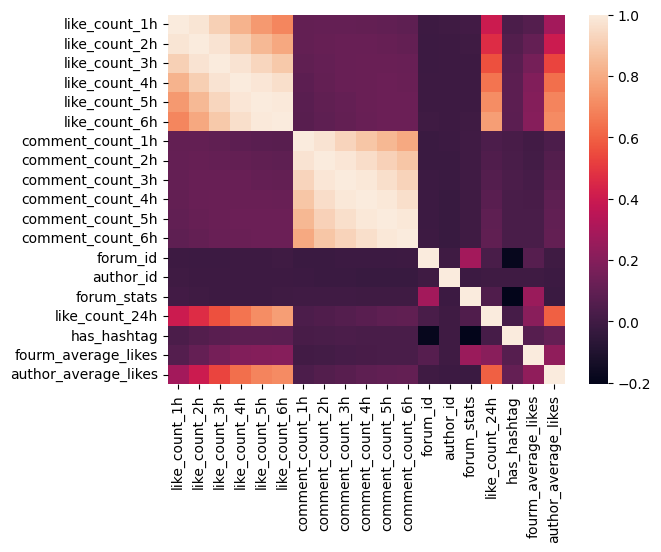

In [33]:
sns.heatmap(train.corr())

In [23]:
valid = pd.read_csv("ML Intern Homework/intern_homework_public_test_dataset.csv")
valid.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.158700,4.970700,6.952300,9.084600,11.20470,13.224100,3.585700,5.629200,7.370500,9.056100,10.692400,12.199300,466839.991500,501339.618600,95.559920,44.141800
std,9.133425,14.256941,20.266684,26.511419,32.45265,38.482172,30.897047,55.840637,66.067185,75.036398,82.797764,90.160994,284712.927981,291717.802182,168.664431,167.441347
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3013.000000,20.000000,0.000000,5.000000
25%,0.000000,1.000000,1.000000,2.000000,2.00000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,174372.000000,245222.000000,13.100000,7.000000
50%,1.000000,2.000000,3.000000,4.000000,5.00000,5.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,492107.000000,506340.000000,33.100000,13.000000
75%,3.000000,5.000000,6.000000,8.000000,9.00000,11.000000,4.000000,5.000000,7.000000,9.000000,11.000000,12.000000,699763.000000,756543.750000,88.200000,30.000000
max,429.000000,617.000000,904.000000,1187.000000,1377.00000,1497.000000,2086.000000,4064.000000,4845.000000,5610.000000,5896.000000,6453.000000,998778.000000,999855.000000,1016.800000,6316.000000


/var/folders/nc/zmjfff853y33j17lwwdk299w0000gn/T/ipykernel_50319/60046355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(valid.corr())


<Axes: >

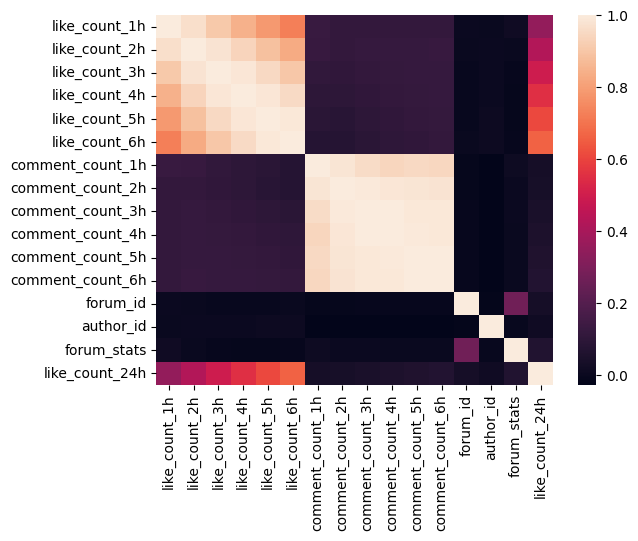

In [24]:
sns.heatmap(valid.corr())